In [1]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
import json

import sys
sys.path.append('../0 utils/')
from tool import *

import matplotlib.pyplot as plt


data_root = '../../MyData/'

## Load data

In [10]:
concat_df = pd.read_csv('./mid_data/1_concat_clusters.csv')
concat_df = concat_df.drop('Year', axis=1)
concat_df = concat_df.rename(columns={
    'cluster_10': 'concat_10',
    'cluster_100': 'concat_100'
})

avg_df = pd.read_csv('./mid_data/2_avg_clusters.csv')
avg_df = avg_df.drop('Year', axis=1)
avg_df = avg_df.rename(columns={
    'cluster_10': 'avg_10',
    'cluster_100': 'avg_100'
})

pca_256_df = pd.read_csv('./mid_data/3_pca_clusters_256.csv')
pca_256_df = pca_256_df.drop('Year', axis=1)
pca_256_df = pca_256_df.rename(columns={
    'cluster_10': 'pca_256_10',
    'cluster_100': 'pca_256_100'
})

pca_26_df = pd.read_csv('./mid_data/3_pca_clusters_26.csv')
pca_26_df = pca_26_df.drop('Year', axis=1)
pca_26_df = pca_26_df.rename(columns={
    'cluster_10': 'pca_26_10',
    'cluster_100': 'pca_26_100'
})

avg_auto_df = pd.read_csv('./mid_data/4_avg-auto_clusters.csv')
avg_auto_df = avg_auto_df.drop('Year', axis=1)
avg_auto_df = avg_auto_df.rename(columns={
    'cluster_10': 'avg_auto_10',
    'cluster_100': 'avg_auto_100'
})

concat_auto_df = pd.read_csv('./mid_data/4_concat-auto_clusters.csv')
concat_auto_df = concat_auto_df.drop('Year', axis=1)
concat_auto_df = concat_auto_df.rename(columns={
    'cluster_10': 'concat_auto_10',
    'cluster_100': 'concat_auto_100'
})

In [11]:
merged_df = pd.merge(avg_df, concat_df, how='left', on=['cik', 'tic'])
merged_df = pd.merge(merged_df, pca_256_df, how='left', on=['cik', 'tic'])
merged_df = pd.merge(merged_df, pca_26_df, how='left', on=['cik', 'tic'])
merged_df = pd.merge(merged_df, avg_auto_df, how='left', on=['cik', 'tic'])
merged_df = pd.merge(merged_df, concat_auto_df, how='left', on=['cik', 'tic'])
merged_df = merged_df.rename(columns={'cik': 'CIK'})

In [12]:
merged_df

,CIK,tic,avg_10,avg_100,concat_10,concat_100,pca_256_10,pca_256_100,pca_26_10,pca_26_100,avg_auto_10,avg_auto_100,concat_auto_10,concat_auto_100
0,850460,WIRE,2,31,NaN,NaN,NaN,NaN,NaN,NaN,9,54,NaN,NaN
1,352541,LNT,6,9,5.0,5.0,6.0,8.0,6.0,90.0,6,3,3.0,3.0
2,1704715,AMR,4,77,5.0,72.0,9.0,56.0,6.0,68.0,2,60,7.0,77.0
3,1575515,SFM,3,99,0.0,53.0,0.0,58.0,0.0,28.0,0,35,8.0,30.0
4,1125376,ENSG,7,54,4.0,55.0,3.0,4.0,3.0,17.0,7,42,6.0,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,1021860,NOV,4,50,1.0,8.0,9.0,89.0,6.0,77.0,4,75,7.0,28.0
1193,1744489,DIS,0,32,2.0,60.0,2.0,76.0,5.0,7.0,7,49,6.0,51.0
1194,1102112,PACW,1,98,NaN,NaN,NaN,NaN,NaN,NaN,3,84,NaN,NaN
1195,28823,DBD,8,64,NaN,NaN,NaN,NaN,NaN,NaN,8,90,NaN,NaN


## Test

In [13]:
dissimilar_df = pd.read_csv(data_root + "dissimilar_pairs_2021.csv")
similar_df = pd.read_csv(data_root + "pairs_gpt_competitors_2021.csv")

In [14]:
classification_columns_10 = {"avg_10", "concat_10", "pca_256_10", "pca_26_10", "avg_auto_10", "concat_auto_10"}
dissimilar_df_results = evaluate_all_classifications(dissimilar_df, merged_df, classification_columns_10)
similar_df_results = evaluate_all_classifications(similar_df, merged_df, classification_columns_10)


Missing CIKs in pairs dataset: 0 (company A), 0 (company B)
CIKs not found in main dataset: 0 (company A), 0 (company B)
Total valid pairs: 2913
Missing CIKs in pairs dataset: 0 (company A), 0 (company B)
CIKs not found in main dataset: 0 (company A), 0 (company B)
Total valid pairs: 2365


In [18]:
similar_df_results = precision_and_false_positive(similar_df, merged_df, classification_columns_10, 70)
similar_df_results.sort_values('Precision', ascending=False)

Missing CIKs in pairs dataset: 0 (company A), 0 (company B)
CIKs not found in main dataset: 0 (company A), 0 (company B)
Total valid pairs: 2365
36353
55844
36932
43533
32633
36120


,Classification_Scheme,Precision,False_Positive_rate,N_Industries,Avg_Firms_per_Industry
1,avg_10,0.610148,0.974160,10,119.7
2,concat_10,0.457082,0.970730,10,92.6
3,avg_auto_10,0.441860,0.975995,10,119.7
0,pca_256_10,0.423679,0.972437,10,92.6
5,concat_auto_10,0.399577,0.973837,10,92.6
4,pca_26_10,0.373784,0.972911,10,92.6


## Check

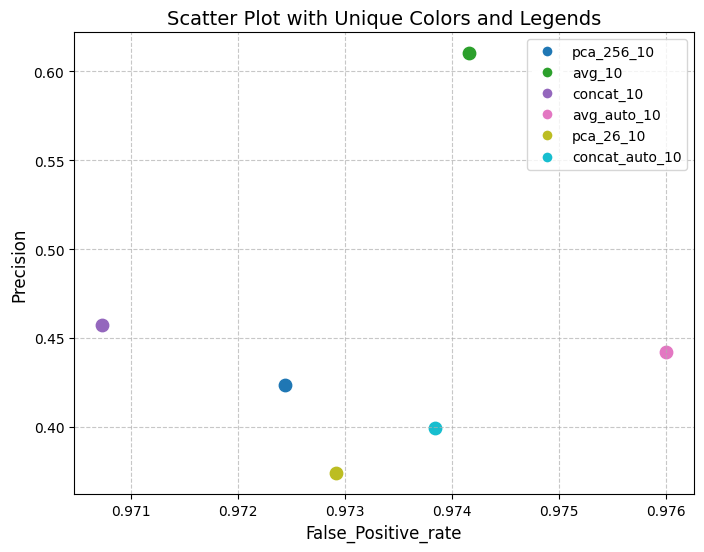

In [19]:
# Sample Data (Replace with your actual data)
possitive_prec = similar_df_results['Precision']
negative_prec = similar_df_results['False_Positive_rate']
names = similar_df_results['Classification_Scheme'].values

# Generate a unique color for each point
colors = plt.cm.get_cmap('tab10', len(names)).colors  # Use 'tab10' colormap for distinct colors

# Create figure
plt.figure(figsize=(8, 6))

# Dictionary to track labels for legend
legend_labels = {}

# Plot each point separately with a unique color
for i, name in enumerate(names):
    color = colors[i % len(colors)]  # Cycle through colors if there are more points than colors
    plt.scatter(negative_prec[i], possitive_prec[i], color=color, label=name, s=80)
    
    # Add label to legend only if not already added
    if name not in legend_labels:
        legend_labels[name] = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=8)

# Add title and labels
plt.title('Scatter Plot with Unique Colors and Legends', fontsize=14)
plt.ylabel('Precision', fontsize=12)
plt.xlabel('False_Positive_rate', fontsize=12)

# Show legend
plt.legend(handles=legend_labels.values(), labels=legend_labels.keys(), loc='best')

# plt.xlim(0, 1)  # Set x-axis range from 0 to 100
# plt.ylim(0, 1)  # Set y-axis range from 0 to 100

# Show grid and plot
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()
